## Data Prep

In [ ]:
import pandas as pd
data = pd.read_csv('PC_data.csv', index_col=0)
data.head(3)

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Ninth,Tenth,gross_income
0,1.658896,0.305305,-0.619868,-1.346817,-0.304893,0.516515,-0.891058,-0.500674,-0.334259,0.373411,105943
1,0.452591,0.280999,-0.239970,-2.680042,-0.019152,0.227053,-0.187350,-0.766402,-0.478071,-0.108427,101740
2,-1.114965,-1.343299,1.086729,0.709625,0.867303,0.247966,0.115770,0.439493,0.267823,-0.406155,96130


Use the first 5 Principal Components to train regression model.

In [ ]:
x = data.iloc[:, :5]
x.head(3)

,First,Second,Third,Fourth,Fifth
0,1.658896,0.305305,-0.619868,-1.346817,-0.304893
1,0.452591,0.280999,-0.239970,-2.680042,-0.019152
2,-1.114965,-1.343299,1.086729,0.709625,0.867303


In [ ]:
y = data[['gross_income']]
y.head(3)

,gross_income
0,105943
1,101740
2,96130


##Modelling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size=0.10,
                                                  shuffle=True,
                                                  random_state=324
                                                 )

In [ ]:
from pandas.core.window.rolling import numba_notes
#Regression Models
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor as XGBRegressor
#Linear Regression ( https://www.w3schools.com/python/python_ml_multiple_regression.asp )
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
#Ridge Regression ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html )
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=.5)
#Lasso Regression ( https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d )
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
lasso = linear_model.Lasso(alpha=0.1)
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
#Random Forrest ( https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 )
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
#Decision Trees ( https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16 )
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
#SVM - SVR
from sklearn import svm
SVM = svm.SVR()
#Gradient Boosting Regressor ( https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor )
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
# create an xgboost regression model: higher performance than gradient boosting
import xgboost as xg
xgb = xg.XGBRegressor()

In [ ]:
model_names = ['Multiple Regression', 'Ridge Regression', 'Lasso Regression', 'KNeighborsRegressor', 'Random Forrest', 'Decision Trees', 'SVM - SVR', 'Gradient Boosting Regressor', 'XGBoost']
models = [lm, ridge, lasso, neigh, rf, dt, SVM, gbr, xgb]

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import r2_score
model_eval = []
for model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_val)
  type(predictions)
  # Calculate the absolute errors
  errors = abs(predictions - y_val.values)
  # Calculate model evaluation metrics
  mae = mean_absolute_error(y_val, predictions)
  mse = mean_squared_error(y_val, predictions)
  rmse = sqrt(mse)
  r2 = r2_score(y_val, predictions)
  print(f'MODEL: {model}')
  print('Mean Absolute Error: ', mae, ' degrees.')
  print('Mean Squared Error:', mse, ' degrees')
  print('RMSE:', rmse, ' degrees')
  print('R2:', r2)
  model_eval.append({'Model': model, 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'RMSE': rmse,'R-squared': r2})

df = pd.DataFrame(model_eval)

MODEL: LinearRegression()
Mean Absolute Error:  7915.378234964389  degrees.
Mean Squared Error: 115046960.85806966  degrees
RMSE: 10725.994632576956  degrees
R2: 0.24139834453340092
MODEL: Ridge(alpha=0.5)
Mean Absolute Error:  7915.405132500357  degrees.
Mean Squared Error: 115046855.27813959  degrees
RMSE: 10725.989710890999  degrees
R2: 0.24139904071093687
MODEL: Lasso(alpha=0.1)
Mean Absolute Error:  7915.383868139228  degrees.
Mean Squared Error: 115046922.01737979  degrees
RMSE: 10725.992821989943  degrees
R2: 0.24139860064283158
MODEL: KNeighborsRegressor(n_neighbors=2)
Mean Absolute Error:  7679.405  degrees.
Mean Squared Error: 115570932.4175  degrees
RMSE: 10750.392198310721  degrees
R2: 0.2379433580701632
MODEL: RandomForestRegressor()
Mean Absolute Error:  7332.3883  degrees.
Mean Squared Error: 106520188.70947434  degrees
RMSE: 10320.861820094015  degrees
R2: 0.29762254567236734
MODEL: DecisionTreeRegressor()
Mean Absolute Error:  9297.573333333334  degrees.
Mean Squared E

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MODEL: SVR()
Mean Absolute Error:  9530.757717612225  degrees.
Mean Squared Error: 153508447.46457437  degrees
RMSE: 12389.852600599184  degrees
R2: -0.012210679066933183


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MODEL: GradientBoostingRegressor(random_state=0)
Mean Absolute Error:  7157.226392296714  degrees.
Mean Squared Error: 99733031.37338892  degrees
RMSE: 9986.642647726458  degrees
R2: 0.3423759989810431
MODEL: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Mean Absolute Error:  7899.382545572917  deg

In [ ]:
df

,Model,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
0,LinearRegression(),7915.378235,1.150470e+08,10725.994633,0.241398
1,Ridge(alpha=0.5),7915.405133,1.150469e+08,10725.989711,0.241399
2,Lasso(alpha=0.1),7915.383868,1.150469e+08,10725.992822,0.241399
3,KNeighborsRegressor(n_neighbors=2),7679.405000,1.155709e+08,10750.392198,0.237943
4,"(DecisionTreeRegressor(max_features=1.0, rando...",7332.388300,1.065202e+08,10320.861820,0.297623
5,DecisionTreeRegressor(),9297.573333,1.686689e+08,12987.258063,-0.112176
6,SVR(),9530.757718,1.535084e+08,12389.852601,-0.012211
7,([DecisionTreeRegressor(criterion='friedman_ms...,7157.226392,9.973303e+07,9986.642648,0.342376
8,"XGBRegressor(base_score=None, booster=None, ca...",7899.382546,1.167870e+08,10806.802997,0.229925


In [ ]:
#crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
GBR=GradientBoostingRegressor(random_state=0)
search_grid={'n_estimators':range(20,81,20),'learning_rate':[0.01, 0.1, 0.25, 0.5, 1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)

In [ ]:
# Fit grid search with reshaped y_train
grid_result = search.fit(X_train, y_train.values.ravel())

# Print grid search summary
print(grid_result)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.1, 0.25, 0.5, 1],
                         'n_estimators': range(20, 81, 20)},
             scoring='neg_mean_squared_error')


In [ ]:
# print best parameter after tuning
print(grid_result.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_result.best_estimator_)

{'learning_rate': 0.1, 'n_estimators': 80}
GradientBoostingRegressor(n_estimators=80, random_state=0)


The best regression models with its optimum hyperparameters (found using grid search) are found. Feature Importance through the use of SHAP, will be run to determine the Principal Components that play the largest role in Gross Income. These PC's are discuessed in more depth in the README.

##Feature Importance

In [ ]:
#Installation and output suppression.
!pip install shap > /dev/null 2>&1

In [ ]:
#Installation
!pip install interpret -q

In [ ]:
import shap

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=80, random_state=0)

In [ ]:
x_train_here = X_train.values
y_train_here = y_train.values.ravel()

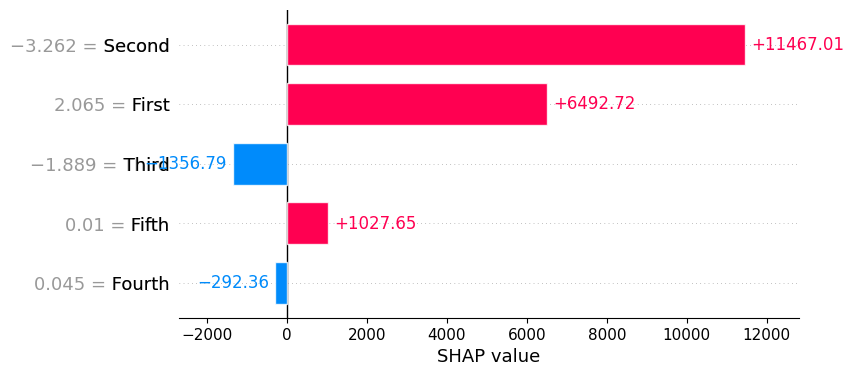

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
# Suppress warnings related to feature names mismatch
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.base')
gbr.fit(x_train_here, y_train_here)
explainer = shap.Explainer(gbr.predict, X_val)
shap_values = explainer(X_val)
shap.plots.bar(shap_values[0])

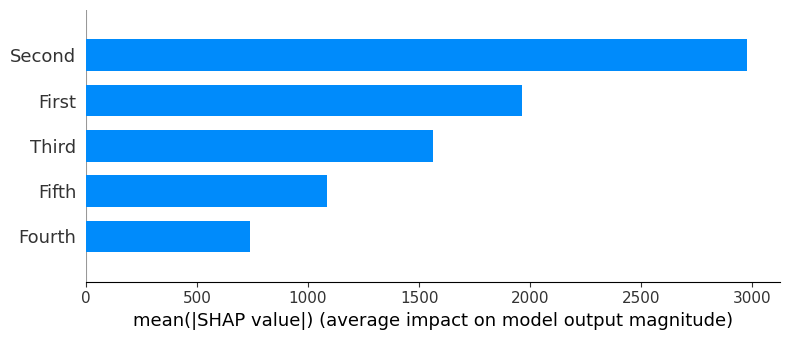

In [ ]:
shap.summary_plot(shap_values, X_val, plot_type="bar")

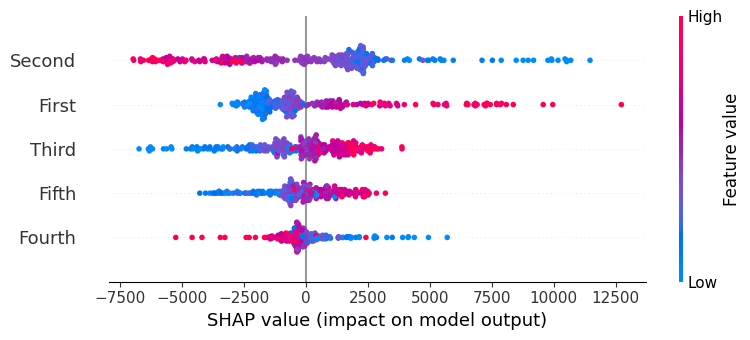

In [ ]:
shap.summary_plot(shap_values, X_val)

In [ ]:
gbr.feature_importances_

array([0.22197902, 0.35184263, 0.17072207, 0.12062095, 0.13483533])

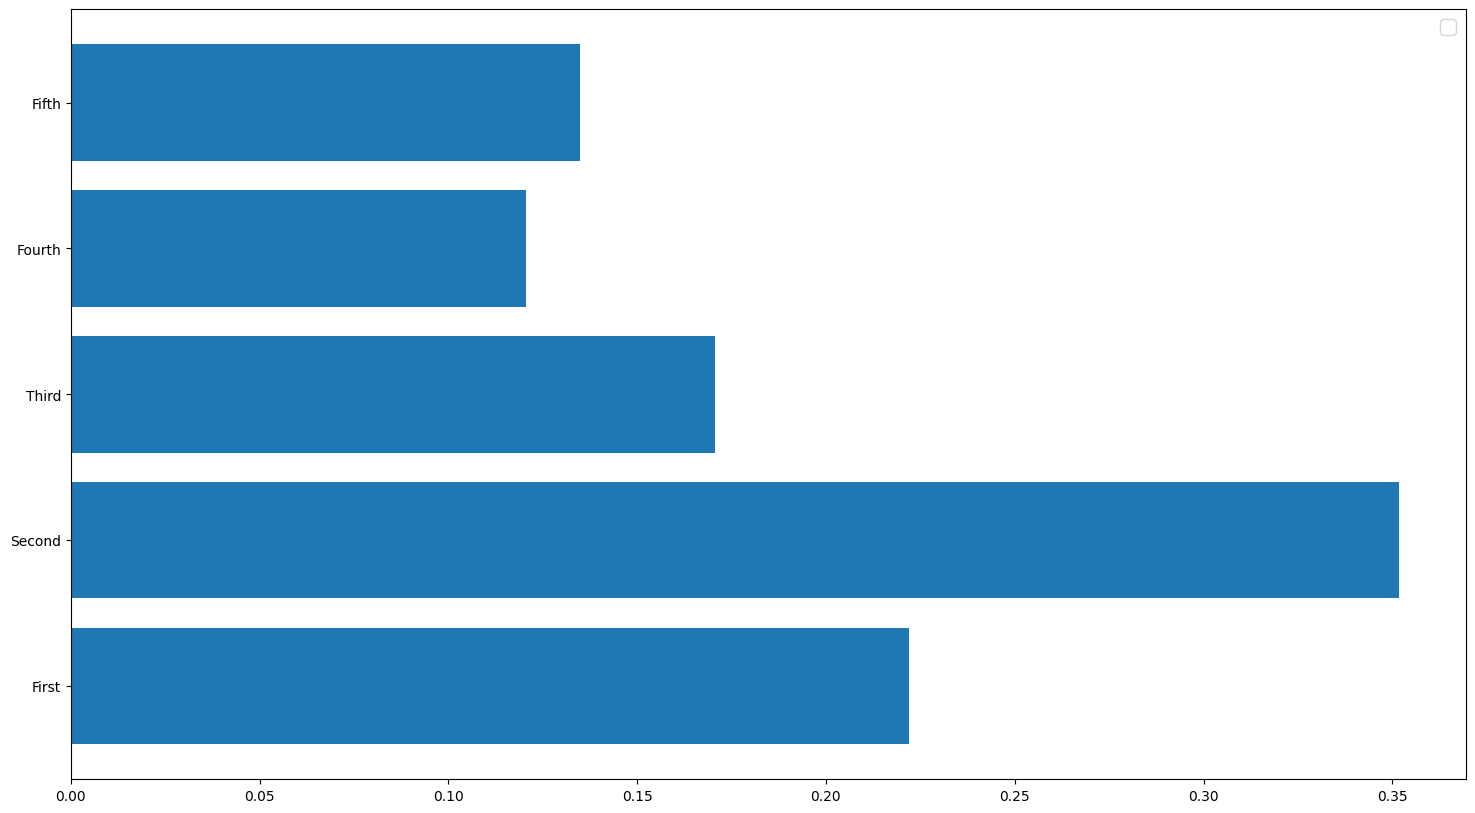

In [ ]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(18,10))
plt.barh(X_train.columns, gbr.feature_importances_)
ax.legend(fontsize = 14)